# Using Historical Data to Predict Batting Success: Step 5 - OPS Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step5_ops_modelling`, the fifth of XXXXX notebooks.  TODO

## *Step 5 - Exploration and Modelling for an OPS Approach*

word words word TODO


## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1 and 4 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data files:
- `./data/step4_alldata.csv`
- `./data/step4_pre_2000.csv`
- `./data/step4_from_2000.csv`

##  Loading Prepared Data Files

In [2]:
alldata_csv = "./data/step4_alldata.csv"
all_data = pd.read_csv(alldata_csv)
all_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,Career AVG,Career SLG,Career OBP,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y7,OPS Y8,OPS Y9,OPS Y10,AVG Y1,AVG Y2,AVG Y3,AVG Y4,AVG Y5,AVG Y6,AVG Y7,AVG Y8,AVG Y9,AVG Y10
0,willeed01,Ed Willett,704,649,56,129,25,10,5,68,25,174,6,24,0,10,0.198767,0.291217,0.235294,0.526511,0.000000,0.219780,0.367510,0.496266,0.379030,0.774655,0.456006,0.692935,0.621154,0.533333,0.000000,0.076923,0.164179,0.190909,0.134146,0.268293,0.165217,0.282609,0.234375,0.200000
1,daussho01,Hooks Dauss,1324,1125,107,212,41,15,6,112,145,288,8,41,0,15,0.188444,0.267556,0.285603,0.553158,1.000000,0.560802,0.578379,0.470550,0.731898,0.400920,0.559740,0.379742,0.542872,0.634387,0.250000,0.177215,0.216495,0.145631,0.222222,0.126437,0.181818,0.144330,0.170732,0.261364
2,coopewi01,Wilbur Cooper,1320,1232,111,295,34,18,6,103,46,139,4,35,0,15,0.239448,0.310877,0.269111,0.579987,0.368132,0.219780,0.462535,0.260180,0.455696,0.519551,0.591622,0.679654,0.537423,0.611333,0.153846,0.076923,0.206522,0.114754,0.215190,0.203883,0.242105,0.295238,0.221239,0.254098
3,mamaual01,Al Mamaux,466,421,39,77,12,2,1,31,27,90,3,12,0,12,0.182898,0.228029,0.237251,0.465279,0.000000,0.550000,0.363387,0.473844,0.475806,0.000000,0.479365,0.464706,0.431818,0.991071,0.000000,0.250000,0.163043,0.190909,0.225806,0.000000,0.174603,0.166667,0.181818,0.250000
4,ruthba01,Babe Ruth,10624,8400,2173,2872,506,137,714,2215,2063,1331,45,45,0,22,0.341905,0.689762,0.473925,1.163687,0.500000,0.952325,0.730611,0.856730,0.967903,1.114268,1.379841,1.355617,1.103689,1.313417,0.200000,0.315217,0.268116,0.325203,0.299685,0.319444,0.375546,0.377079,0.314496,0.394231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,perezhe01,Hernan Perez,1846,1745,188,436,74,11,45,180,76,397,1,12,12,10,0.249857,0.382235,0.279716,0.661951,1.000000,0.444664,0.533333,0.583502,0.730326,0.703826,0.676495,0.641605,0.333333,0.195489,0.500000,0.196970,0.200000,0.243346,0.272277,0.259259,0.253165,0.228448,0.166667,0.052632
2395,gomesya01,Yan Gomes,3274,3006,369,742,158,8,117,416,185,794,50,2,31,10,0.246840,0.421490,0.298594,0.720084,0.630983,0.825949,0.784906,0.658537,0.527451,0.707728,0.761775,0.704177,0.787218,0.722537,0.204082,0.293515,0.278351,0.231405,0.167331,0.231672,0.265509,0.222930,0.284404,0.252149
2396,simmoan01,Andrelton Simmons,4731,4366,493,1156,200,23,70,437,297,448,26,13,29,10,0.264773,0.369217,0.313480,0.682697,0.750827,0.691599,0.617196,0.659624,0.689723,0.751810,0.754196,0.673284,0.702389,0.557754,0.289157,0.247525,0.244444,0.265421,0.281250,0.278438,0.292419,0.263819,0.296610,0.223301
2397,mercejo03,Jordy Mercer,3416,3104,327,796,173,15,66,308,246,589,27,22,17,10,0.256443,0.385631,0.314968,0.700599,0.635674,0.771547,0.692806,0.613224,0.701352,0.732539,0.695653,0.747463,0.472727,0.671493,0.209677,0.285285,0.254941,0.243655,0.256262,0.254980,0.251269,0.269531,0.200000,0.254237


In [3]:
# pre_2000_csv = "./data/step4_pre_2000.csv"
# pre_2000 = pd.read_csv(pre_2000_csv)
# pre_2000

In [4]:
# from_2000_csv = "./data/step4_from_2000.csv"
# from_2000 = pd.read_csv(from_2000_csv)
# from_2000

In [5]:
import matplotlib.pyplot as plt

def scatter_plot(feature, target):
    plt.figure(figsize=(10, 8))
    plt.scatter(
        all_data[feature],
        all_data[target],
        c='blue'
    )
    plt.xlabel("{}".format(feature))
    plt.ylabel("{}".format(target))
    plt.show()

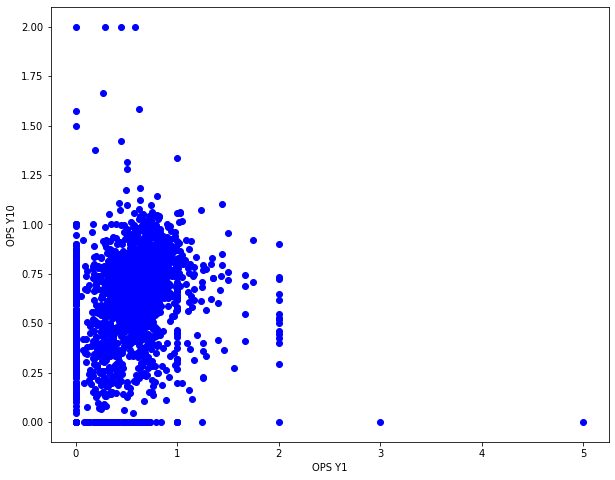

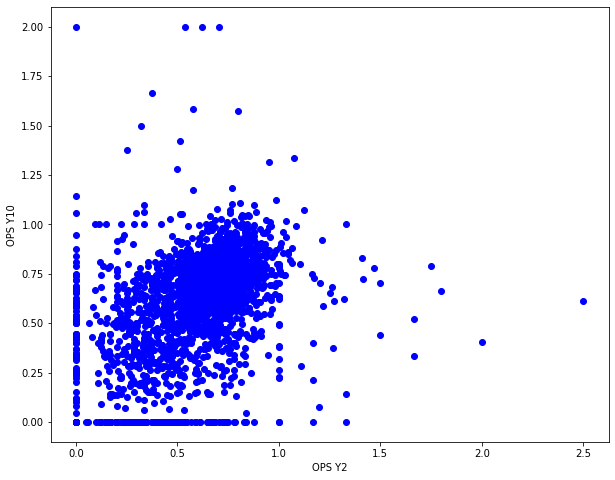

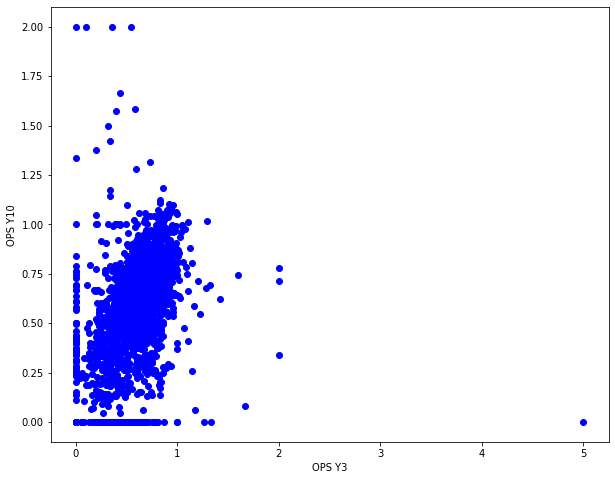

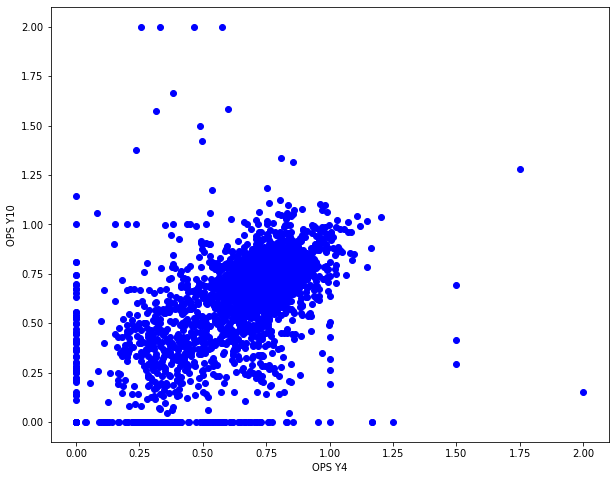

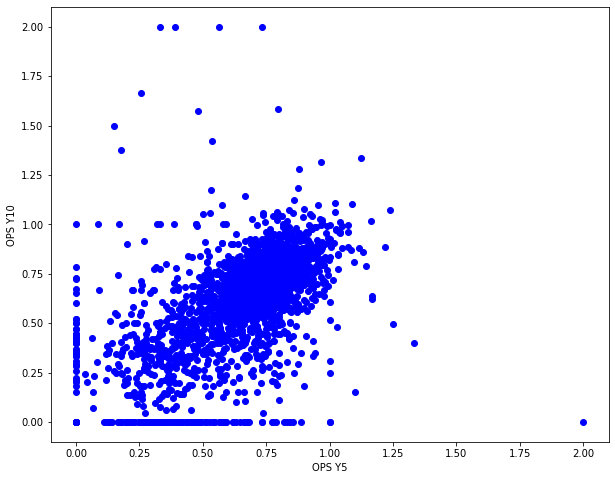

In [6]:
scatter_plot('OPS Y1', 'OPS Y10')
scatter_plot('OPS Y2', 'OPS Y10')
scatter_plot('OPS Y3', 'OPS Y10')
scatter_plot('OPS Y4', 'OPS Y10')
scatter_plot('OPS Y5', 'OPS Y10')

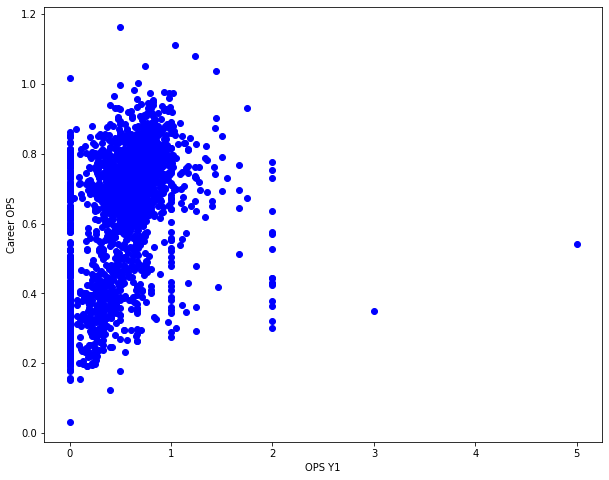

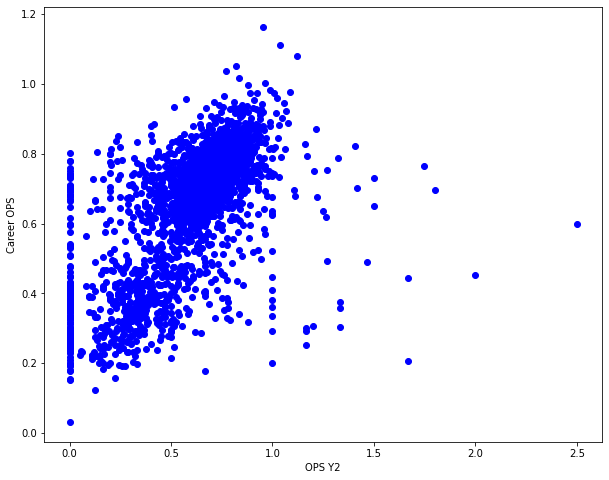

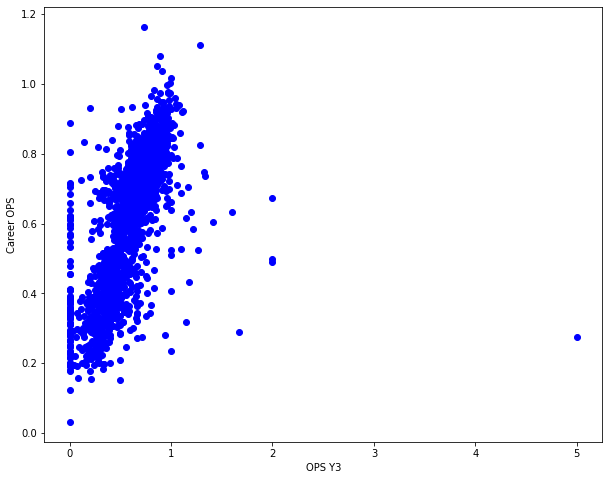

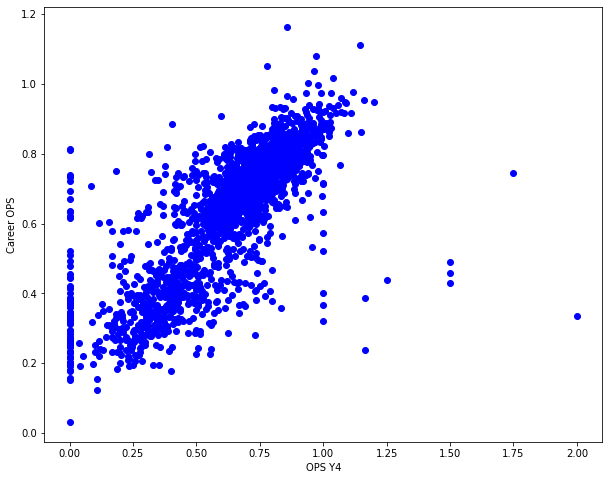

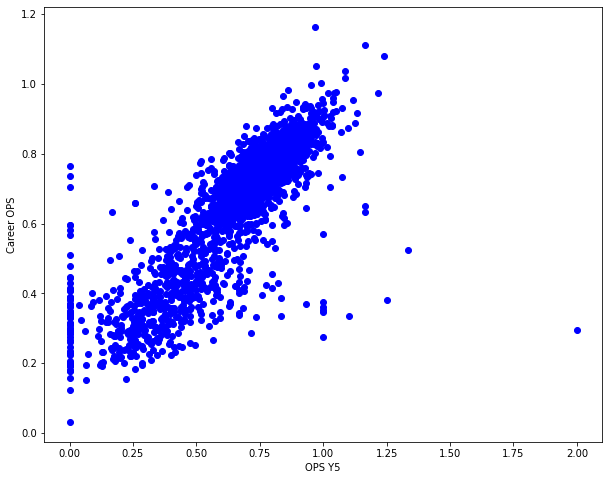

In [7]:
scatter_plot('OPS Y1', 'Career OPS')
scatter_plot('OPS Y2', 'Career OPS')
scatter_plot('OPS Y3', 'Career OPS')
scatter_plot('OPS Y4', 'Career OPS')
scatter_plot('OPS Y5', 'Career OPS')

I'm surprised by these results. I anticipated the 10th season OPS value to be more strongly correalated than the Career OPS, but it looks like Career OPS may be more accurately prediced.

It seems like 3rd, 4th, and 5th season OPS values are more strongly correalated (increasingly so) with the value we hope to predict -- either 10th season OPS or Career OPS. However, Career OPS values tend to be more strongly related.

Let's build two models, both with the 3rd, 4th, and 5th season OPS values as features. Model 1 (M1) will aim to predict the 10th season OPS and Model 2 (M2) will aim to predict the Career OPS. Based on these plots, we might expect to see more accuracy with M2. Let's try and see.

In [8]:
focus_on = ['ID', 'Player', 'Career OPS', 'OPS Y3', 'OPS Y4', 'OPS Y5', 'OPS Y10'] 

all_data_ops = all_data[focus_on]
all_data_ops

,ID,Player,Career OPS,OPS Y3,OPS Y4,OPS Y5,OPS Y10
0,willeed01,Ed Willett,0.526511,0.367510,0.496266,0.379030,0.533333
1,daussho01,Hooks Dauss,0.553158,0.578379,0.470550,0.731898,0.634387
2,coopewi01,Wilbur Cooper,0.579987,0.462535,0.260180,0.455696,0.611333
3,mamaual01,Al Mamaux,0.465279,0.363387,0.473844,0.475806,0.991071
4,ruthba01,Babe Ruth,1.163687,0.730611,0.856730,0.967903,1.313417
...,...,...,...,...,...,...,...
2394,perezhe01,Hernan Perez,0.661951,0.533333,0.583502,0.730326,0.195489
2395,gomesya01,Yan Gomes,0.720084,0.784906,0.658537,0.527451,0.722537
2396,simmoan01,Andrelton Simmons,0.682697,0.617196,0.659624,0.689723,0.557754
2397,mercejo03,Jordy Mercer,0.700599,0.692806,0.613224,0.701352,0.671493


In [9]:
X = all_data_ops[['OPS Y3', 'OPS Y4', 'OPS Y5']]
X

,OPS Y3,OPS Y4,OPS Y5
0,0.367510,0.496266,0.379030
1,0.578379,0.470550,0.731898
2,0.462535,0.260180,0.455696
3,0.363387,0.473844,0.475806
4,0.730611,0.856730,0.967903
...,...,...,...
2394,0.533333,0.583502,0.730326
2395,0.784906,0.658537,0.527451
2396,0.617196,0.659624,0.689723
2397,0.692806,0.613224,0.701352


In [10]:
X = X.values
X

array([[0.36751027, 0.49626623, 0.37903   ],
       [0.57837942, 0.47055016, 0.73189763],
       [0.46253469, 0.2601798 , 0.4556962 ],
       ...,
       [0.61719577, 0.6596236 , 0.68972288],
       [0.69280632, 0.61322418, 0.70135209],
       [0.72784427, 0.75575808, 0.81609157]])

In [11]:
y1 = all_data_ops[['OPS Y10']]
y1

,OPS Y10
0,0.533333
1,0.634387
2,0.611333
3,0.991071
4,1.313417
...,...
2394,0.195489
2395,0.722537
2396,0.557754
2397,0.671493


In [12]:
y1 = y1.values
y1

array([[0.53333333],
       [0.63438735],
       [0.61133342],
       ...,
       [0.55775399],
       [0.67149339],
       [0.93949936]])

In [13]:
y2 = all_data_ops['Career OPS']
y2

0       0.526511
1       0.553158
2       0.579987
3       0.465279
4       1.163687
          ...   
2394    0.661951
2395    0.720084
2396    0.682697
2397    0.700599
2398    0.806649
Name: Career OPS, Length: 2399, dtype: float64

In [14]:
y2 = y2.values
y2

array([0.52651137, 0.55315806, 0.57998739, ..., 0.68269696, 0.70059903,
       0.80664911])

M1

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)
X_validate, X_test, y1_validate, y1_test = train_test_split(X_test, y1_test, test_size = 0.5, random_state = 42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


M1 = LinearRegression()
M1.fit(X_train, y1_train)

y1_predict_validate = M1.predict(X_validate)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1_validate, y1_predict_validate)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y1_validate, y1_predict_validate)))

from sklearn.metrics import r2_score
r2 = r2_score(y1_validate, y1_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.148
RMSE is 0.238
R-Squared is 0.295


M2

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.3, random_state = 42)
X_validate, X_test, y2_validate, y2_test = train_test_split(X_test, y2_test, test_size = 0.5, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


M2 = LinearRegression()
M2.fit(X_train, y2_train)


y2_predict_validate = M2.predict(X_validate)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_validate, y2_predict_validate)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y2_validate, y2_predict_validate)))

from sklearn.metrics import r2_score
r2 = r2_score(y2_validate, y2_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.051
RMSE is 0.087
R-Squared is 0.769


M3 = M2 w/ LassoCV

In [17]:
from sklearn.linear_model import LassoCV

M3 = LassoCV(cv = 10)
M3.fit(X_train, y2_train.ravel())

y2_predict_validate = M3.predict(X_validate)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_validate, y2_predict_validate)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y2_validate, y2_predict_validate)))

from sklearn.metrics import r2_score
r2 = r2_score(y2_validate, y2_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.051
RMSE is 0.087
R-Squared is 0.769


M4 = M2 w/RidgeCV

In [18]:
from sklearn.linear_model import RidgeCV

M4 = RidgeCV(cv = 10)
M4.fit(X_train, y2_train.ravel())

y2_predict_validate = M4.predict(X_validate)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_validate, y2_predict_validate)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y2_validate, y2_predict_validate)))

from sklearn.metrics import r2_score
r2 = r2_score(y2_validate, y2_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.051
RMSE is 0.087
R-Squared is 0.768


M5  Grad Boost

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

M5 = GradientBoostingRegressor()
M5.fit(X_train, y2_train)

y2_predict_validate = M5.predict(X_validate)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_validate, y2_predict_validate)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y2_validate, y2_predict_validate)))

from sklearn.metrics import r2_score
r2 = r2_score(y2_validate, y2_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.045
RMSE is 0.063
R-Squared is 0.877


M6 Grad Boost w/ CV

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

M6 = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=50, n_repeats=10, random_state=42)
n_scores = cross_val_score(M6, X_train, y2_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# fit the model on the whole dataset
M6 = GradientBoostingRegressor()
M6.fit(X_train, y2_train)

y2_predict_validate = M6.predict(X_validate)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_validate, y2_predict_validate)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y2_validate, y2_predict_validate)))

from sklearn.metrics import r2_score
r2 = r2_score(y2_validate, y2_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

MAE: -0.046 (0.008)
The performance of the model
--------------------------------------
MAE is 0.044
RMSE is 0.063
R-Squared is 0.879


### test

In [20]:
y2_predict_test = M5.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_test, y2_predict_test)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y2_test, y2_predict_test)))

from sklearn.metrics import r2_score
r2 = r2_score(y2_test, y2_predict_test)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.046
RMSE is 0.064
R-Squared is 0.868


### My Test with My Data....

In [ ]:
# y_my_test = from_2000_career[['OPS Y6', 'OPS Y10', 'Career OPS']]
# y_my_test

In [ ]:
X_my_test = from_2000_career[['OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5']]
X_my_test

In [ ]:
# names_my_test = from_2000_career[['Player']]
# names_my_test

'''
Miguel Cabrera
Albert Pujols
Ichiro Suzuki
Robinson Cano
Sandy Leon
'''


In [ ]:
my_player_list = pd.DataFrame()


my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Miguel Cabrera']],
                          ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Albert Pujols']],
                           ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Ichiro Suzuki']],
                           ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Robinson Cano']],
                           ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Sandy Leon']],
                           ignore_index=True)

my_player_list

In [ ]:
y_my_test = my_player_list[['OPS Y6', 'OPS Y10', 'Career OPS']]
y_my_test

In [ ]:
X_my_test = my_player_list[['OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5']]
X_my_test

In [ ]:
predict_my_test = LinReg.predict(X_my_test.values)
predict_my_test

#clf_1.predict(X_2000_1.values)

In [ ]:
y_my_test